<h1>Exponential Smoothing (Holt Winters)</h1>

<p>Prepares dataframe, creates model, and fits the model with no parameters. Here used hyper_parameter.py to determined the best combination for the ES model for both hourly and daily.</p>
<p>Basically the best combination was trend=add, seasonal=add, and seasonal_periods=168 (weekly)</p>

In [7]:
# Import dependencies
import os

from statsmodels.tsa.api import ExponentialSmoothing
from data_process import prepare_dataframe

# Change the file path to the location of your csv file
file_path = "../../../CLT_data.csv"

# Prepare the dataframe for the Holt-Winters model. Change "d" for daily data, "h" for hourly data.
df = prepare_dataframe(file_path, "h")

# Create model with trend and seasonality and seasonal periods. 
# Update seasonal_periods to 12 for monthly data, 7 for daily, 24 for hourly data.
hw_model = ExponentialSmoothing(df['call_count'], trend='add', seasonal='add', seasonal_periods=168)
hw_fitted = hw_model.fit()

<h2>Plot data for seasonality forcast.</h2>

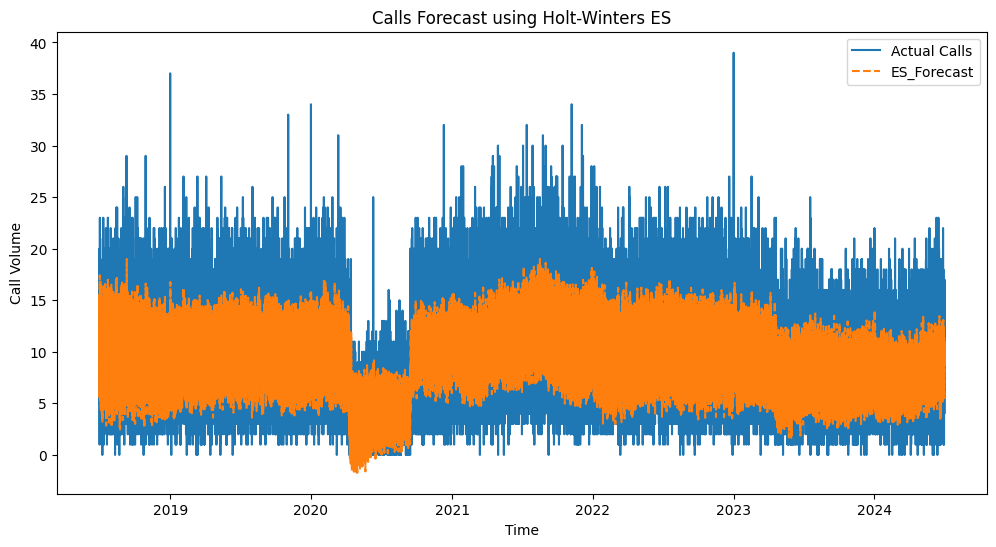

In [8]:
import matplotlib.pyplot as plt

# Add predictions to the dataframe
df["forecast"] = hw_fitted.fittedvalues

# Plot the actual vs. forecasted values
plt.figure(figsize=(12,6))
plt.plot(df.index, df["call_count"], label="Actual Calls")
plt.plot(df.index, df["forecast"], label="ES_Forecast", linestyle="dashed")
plt.legend()
plt.title("Calls Forecast using Holt-Winters ES")
plt.xlabel("Time")
plt.ylabel("Call Volume")
plt.show()

<h2>Verifies accuracy of the model</h2>
<p>Uses the Mean Absolute Error (MAE) and the Root Mean Square Deviation (RMSE). The lower the better</p>

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(df["call_count"], df["forecast"])
rmse = np.sqrt(mean_squared_error(df["call_count"], df["forecast"]))

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

MAE: 2.64, RMSE: 3.37


<h2>Forecast future calls.</h2>
Here we try and forcast a week in the future

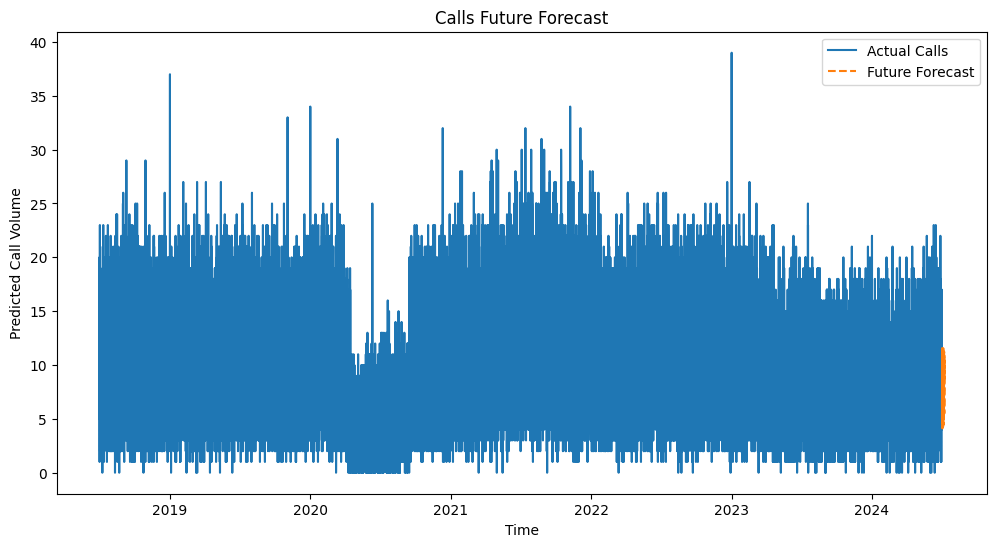

In [10]:
# Predict next X steps
# Depending on # of seasonal_periods, future_steps should be a multiple of that number
future_steps = 168
forecast = hw_fitted.forecast(steps=future_steps)

# Plot Future Forecast
plt.figure(figsize=(12,6))
plt.plot(df.index, df["call_count"], label="Actual Calls")
plt.plot(forecast.index, forecast, label="Future Forecast", linestyle="dashed")
plt.legend()
plt.title("Calls Future Forecast")
plt.xlabel("Time")
plt.ylabel("Predicted Call Volume")
plt.show()

<h2>Now we try to test out the best daily model.</h2>
<p>Basically the best combination was trend=None, seasonal=mul, and seasonal_periods=7 (weekly)</p>
<p>If we start to break things up into smaller call grid bins, "mul" won't work when there is a value of 0 in this model.</p>
<p>So we might need to look out for this one, or select the next best combo which is trend=None, seasonal=add, and seasonal_periods=7 (weekly)</p>

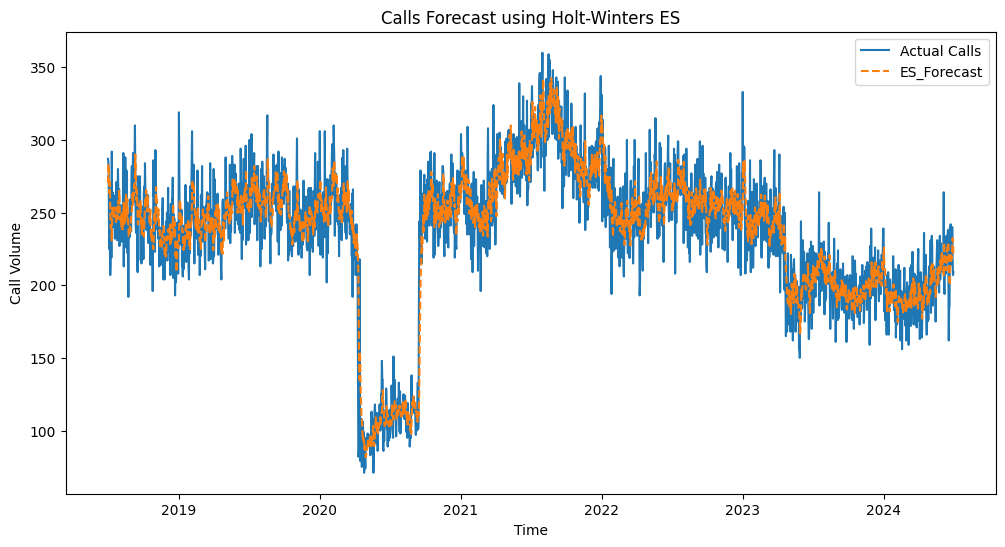

In [11]:
df_daily = prepare_dataframe(file_path, "d")

# Create model with trend and seasonality and seasonal periods. 
# Update seasonal_periods to 12 for monthly data, 7 for daily, 24 for hourly data.
hw_model = ExponentialSmoothing(df_daily['call_count'], trend=None, seasonal='mul', seasonal_periods=7)
hw_fitted = hw_model.fit()

# Add predictions to the dataframe
df_daily["forecast"] = hw_fitted.fittedvalues

# Plot the actual vs. forecasted values
plt.figure(figsize=(12,6))
plt.plot(df_daily.index, df_daily["call_count"], label="Actual Calls")
plt.plot(df_daily.index, df_daily["forecast"], label="ES_Forecast", linestyle="dashed")
plt.legend()
plt.title("Calls Forecast using Holt-Winters ES")
plt.xlabel("Time")
plt.ylabel("Call Volume")
plt.show()

<h2>Accuracy of the model</h2>

In [12]:
mae = mean_absolute_error(df_daily["call_count"], df_daily["forecast"])
rmse = np.sqrt(mean_squared_error(df_daily["call_count"], df_daily["forecast"]))

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

MAE: 15.85, RMSE: 20.73
